In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("kc_house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Imperitive 1 : Clustering only possible for numeric data. So we need to check for categorical values

data.dtypes #Data is of type object

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
# Choosing cols which are numeric in nature and have numeric interpretation
# Cluster profiling is required to look at the segments inside a data
# Cluster profiling will be done later

data_num = data[['price','bedrooms','bathrooms','sqft_living']]


In [6]:
# Imperitive 2 : Scaling of data (this is Z Scaling)

def scale(x):
    return (x-np.mean(x))/np.std(x)

data_scaled = data_num.apply(scale, axis = 0)

In [7]:
# Scaling data with SKLearn

import sklearn.preprocessing as preprocessing
data_scale = preprocessing.scale(data_num, axis = 0)

In [8]:
data_scale # output of SKlearn is always a numpy array

array([[-0.86671733, -0.39873715, -1.44746357, -0.97983502],
       [-0.00568792, -0.39873715,  0.1756067 ,  0.53363434],
       [-0.98084935, -1.47395936, -1.44746357, -1.42625404],
       ...,
       [-0.37586519, -1.47395936, -1.77207762, -1.15404732],
       [-0.38158814, -0.39873715,  0.50022075, -0.52252773],
       [-0.58588173, -1.47395936, -1.77207762, -1.15404732]])

In [9]:
data_scale.shape

(21613, 4)

In [10]:
# Creating Cluster Model (KNN)

import sklearn.cluster as cluster

In [11]:
kmeans = cluster.KMeans(n_clusters=3,init="k-means++") #initial assumption of 3 clusters
kmeans = kmeans.fit(data_scale)

In [12]:
kmeans.labels_

array([2, 0, 2, ..., 2, 0, 2])

In [13]:
kmeans.cluster_centers_

array([[-0.03498337,  0.35647845,  0.36999482,  0.22617315],
       [ 1.88567759,  1.08383594,  1.53701246,  1.91799428],
       [-0.46412963, -0.7252742 , -0.86350929, -0.79078008]])

In [14]:
# Scree Plot or Elbow Plot to find optimal range of k iterations

from scipy.spatial.distance import cdist

K = range(1,20)
wss = []

for k in K:
    kmeans = cluster.KMeans(n_clusters=k, init = 'k-means++')
    kmeans.fit(data_scale)
    wss.append(sum(np.min(cdist(data_scale, kmeans.cluster_centers_,'euclidean'), axis=1)) / data_scale.shape[0])

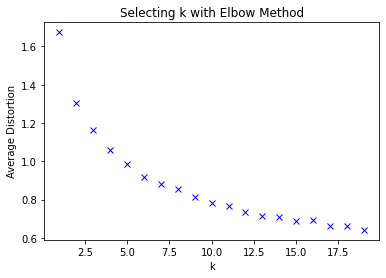

In [16]:
plt.plot(K, wss,'bx')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with Elbow Method')

plt.show()

In [19]:
import sklearn.metrics as metrics
labels = cluster.KMeans(n_clusters=8, random_state=200).fit(data_scale).labels_

In [20]:
 metrics.silhouette_score(data_scale, labels, metric='euclidean', sample_size =10000, random_state=200)

0.2835292946671927

In [23]:
for i in range(7,13):
    labels=cluster.KMeans(n_clusters=i, random_state=200).fit(data_scale).labels_
    print("Silhouette score for k= " + str(i)+str(metrics.silhouette_score(data_scale,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k= 70.27749569568576365
Silhouette score for k= 80.2876565619801347
Silhouette score for k= 90.2827955568043907
Silhouette score for k= 100.2795895054563025
Silhouette score for k= 110.2851598005065985
Silhouette score for k= 120.2796213359680435
